In [1]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
import datetime
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, MaxPooling2D ,Dropout, Flatten
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow.keras as keras
from tensorflow.keras import regularizers

In [2]:
from load_cifar import load_training_batch
from load_cifar import load_testing_batch
from load_cifar import features_reshape
from load_cifar import display_data_stat
from load_cifar import preprocess_data
import load_cifar

<h1>Hyperparameter</h1>

In [4]:
path = "cifar-10-batches-py"

In [5]:
preprocess_data(path)

(45000,)
(45000, 10)


<h1>Placeholder</h1>

In [6]:
def plot_cifar(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i])
        plt.xticks([])
        plt.yticks([])
plt.show()

<h1>LeNet-5</h1>

In [11]:
"""
Define Lenet-5 model
"""
model = Sequential()
# convolution 1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation="tanh", input_shape=(32, 32, 3)))
# pooling 1 (subsampling)
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# convolution 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation="tanh", padding="valid"))
# pooling 2 (subsampling)
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# convolution 3
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=1, activation="tanh", padding="valid"))
# flatten the convolution to connect with full connectted layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(84, activation="tanh"))
# output layer
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

<h1>Training, validation and testing</h1>
<h2>Train your model only 10 epochs.</h2>
<h2>1.Print out validation accuracy after each training epoch</h2>
<h2>2.Print out training time for each training epoch</h2>
<h2>3.Print out testing accuracy</h2>

In [12]:
val_features, val_labels = pickle.load(open('val_data.pickle','rb'))
train_features,train_labels = pickle.load(open('train_data.pickle','rb'))
test_features, test_labels = pickle.load(open('test_data.pickle','rb'))
train_features = load_cifar.features_reshape(train_features)
val_features = load_cifar.features_reshape(val_features)
test_features = load_cifar.features_reshape(test_features)

In [16]:
train_labels.shape

TensorShape([45000, 10])

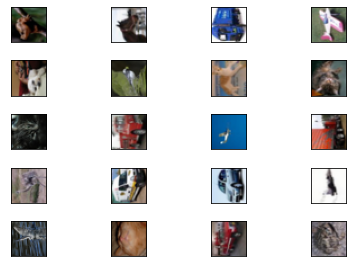

In [13]:
plot_cifar(train_features, train_labels)

In [14]:
print('Train: X=%s, y=%s' % (train_features.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_features.shape, test_labels.shape))
print(train_labels)

Train: X=(45000, 32, 32, 3), y=(45000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(45000, 10), dtype=float32)


In [13]:
history = model.fit(train_features, train_labels, batch_size=128, epochs=15, validation_data=(val_features, val_labels))

Epoch 1/15
352/352 [==============================] - 3s 6ms/step - loss: 1.8432 - accuracy: 0.3465 - val_loss: 1.7377 - val_accuracy: 0.3846
Epoch 2/15
352/352 [==============================] - 2s 5ms/step - loss: 1.7063 - accuracy: 0.4014 - val_loss: 1.6390 - val_accuracy: 0.4178
Epoch 3/15
352/352 [==============================] - 2s 4ms/step - loss: 1.6059 - accuracy: 0.4358 - val_loss: 1.5408 - val_accuracy: 0.4466
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 1.5076 - accuracy: 0.4662 - val_loss: 1.4681 - val_accuracy: 0.4692
Epoch 5/15
352/352 [==============================] - 2s 5ms/step - loss: 1.4326 - accuracy: 0.4924 - val_loss: 1.4062 - val_accuracy: 0.4926
Epoch 6/15
352/352 [==============================] - 2s 5ms/step - loss: 1.3754 - accuracy: 0.5132 - val_loss: 1.3759 - val_accuracy: 0.5150
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 1.3299 - accuracy: 0.5273 - val_loss: 1.3583 - val_accuracy: 0.5106
Epoch 

In [14]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2945 - accuracy: 0.5456


[1.2945088148117065, 0.5455999970436096]

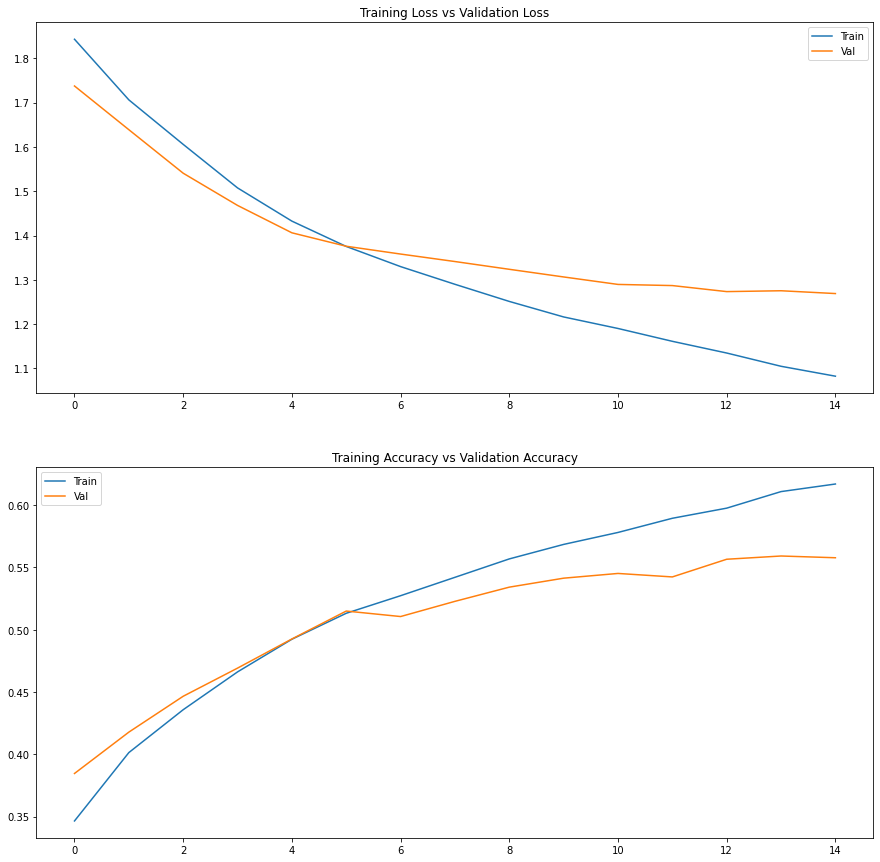

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [4]:
"""
Model for hp tuner
"""
def cifar_model(hp):
    """
    define model for hyper tune
    """
    model = keras.Sequential()
    weight_decay = 1e-4
    model.add(Conv2D(filters=6, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation="elu", input_shape=(32, 32, 3)))
    for i in range(hp.Int("cnn_layers", 1, 2)):
        model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
        model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
        model.add(keras.layers.BatchNormalization())
        model.add(Dropout(0.1*i))
    model.add(Conv2D(
            hp.Int(f"filters_{i}", 4, 128, step=16),
            kernel_size=(3, 3),
            kernel_regularizer=regularizers.l2(weight_decay),
            activation="elu"))
    
    model.add(Flatten())
    for i in range(hp.Int("num_layers", 1, 4)):
        model.add(Dense(
                units=hp.Int("units_" + str(i), min_value=16, max_value=512, step=32),
                activation="elu",))

    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log', default=1e-3)),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    return model

In [20]:
tuner2 = kt.BayesianOptimization(
    cifar_model,
    objective="val_accuracy",
    max_trials=20,
    directory='my_dir',
    project_name='cifar_tuner_4')

tuner2.search_space_summary()

Search space summary
Default search space size: 3
cnn_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [5]:
tuner = kt.Hyperband(
    cifar_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='hyperband_0'
)



stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)

tuner.search_space_summary()

Search space summary
Default search space size: 5
cnn_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 128, 'step': 16, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [6]:
tuner.search(train_features, train_labels, batch_size=128, epochs=10, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 43s]
val_accuracy: 0.5884444713592529

Best val_accuracy So Far: 0.7038888931274414
Total elapsed time: 00h 07m 50s
INFO:tensorflow:Oracle triggered exit


In [21]:
#START TUNING
tuner2.search(val_features, val_labels, epochs=5, validation_split=0.1)


Trial 20 Complete [00h 00m 08s]
val_accuracy: 0.3400000035762787

Best val_accuracy So Far: 0.578000009059906
Total elapsed time: 00h 03m 27s
INFO:tensorflow:Oracle triggered exit


In [7]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features,
                    train_labels,
                    batch_size=128,
                    epochs=15,
                    validation_data=(val_features, val_labels))

Epoch 1/15
352/352 [==============================] - 4s 9ms/step - loss: 1.4239 - accuracy: 0.5182 - val_loss: 4.2834 - val_accuracy: 0.1596
Epoch 2/15
352/352 [==============================] - 3s 7ms/step - loss: 0.9572 - accuracy: 0.6760 - val_loss: 0.9871 - val_accuracy: 0.6644
Epoch 3/15
352/352 [==============================] - 3s 7ms/step - loss: 0.7677 - accuracy: 0.7432 - val_loss: 1.1555 - val_accuracy: 0.6304
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 0.6440 - accuracy: 0.7861 - val_loss: 0.9086 - val_accuracy: 0.7082
Epoch 5/15
352/352 [==============================] - 3s 7ms/step - loss: 0.5428 - accuracy: 0.8213 - val_loss: 0.9809 - val_accuracy: 0.7114
Epoch 6/15
352/352 [==============================] - 3s 7ms/step - loss: 0.4489 - accuracy: 0.8569 - val_loss: 0.9366 - val_accuracy: 0.7232
Epoch 7/15
352/352 [==============================] - 3s 7ms/step - loss: 0.3701 - accuracy: 0.8855 - val_loss: 0.9973 - val_accuracy: 0.7228
Epoch 

313/313 [==============================] - 1s 4ms/step - loss: 1.4155 - accuracy: 0.7391
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 20)        1100      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 20)        80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 20)        0         
_______________________________

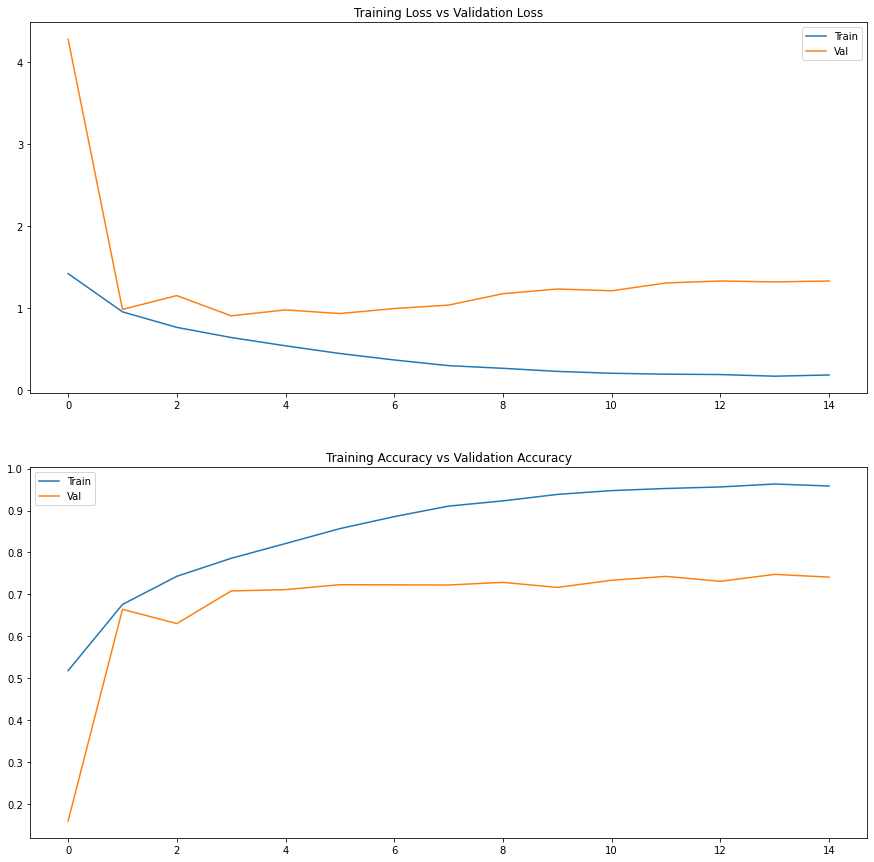

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])
model.evaluate(test_features, test_labels)
model.summary()